# **Εργασία 1 - Τεχνικές Εξόρυξης Δεδομένων**
Ονοματεπώνυμα: Αλέξανδρος Κούτρας

Α.Μ: 1115202100073

In [102]:
pip install datasets

In [103]:
import re
import ast
import nltk
import json
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from wordcloud import WordCloud
from transformers import pipeline
from datasets import load_dataset
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# **Task 1: Data Exploration and Feature Engineering**
Extract data for any five categories that you like. Parse the JSON files and create the csv file(s) that you are going to use for the rest of the Tasks.

In [105]:
# Read the JSON file using the given load_dataset function
meta_Electronics = load_dataset("McAuley-Lab/Amazon-Reviews-2023", name="raw_meta_Electronics", split="full", streaming=True, trust_remote_code=True)
reviews_Electronics = load_dataset("McAuley-Lab/Amazon-Reviews-2023", name="raw_review_Electronics", split="full", streaming=True, trust_remote_code=True)

# Add to a list the unnecessary columns and remove them from the dataset
meta_columns_to_remove = ['images', 'bought_together', 'subtitle', 'author', 'videos']
meta_Electronics = meta_Electronics.remove_columns(meta_columns_to_remove)
reviews_Electronics = reviews_Electronics.remove_columns(['images'])

subset_meta_Electronics = []
subset_reviews_Electronics = []

# Iterate through the dataset and keep a number of rows
for record in meta_Electronics:
  subset_meta_Electronics.append(record)
  if len(subset_meta_Electronics) >= 10000:
    break

for record in reviews_Electronics:
  subset_reviews_Electronics.append(record)
  if len(subset_reviews_Electronics) >= 10000:
    break

# Create the pandas dataframe
pandas_subset_meta_Electronics = pd.DataFrame(subset_meta_Electronics)
pandas_subset_reviews_Electronics = pd.DataFrame(subset_reviews_Electronics)

# Rename a column so there are no conflicts on the merge
pandas_subset_meta_Electronics.rename(columns={'title': 'name'}, inplace=True)

# Merge the 2 datasets using as key the parent_asin column and the reviews dataframe as the left merger
electronics = pd.merge(pandas_subset_reviews_Electronics,pandas_subset_meta_Electronics,on='parent_asin',how='left')

# Drop all the NaN values from the dataframe
electronics = electronics.dropna()

#Save the dataframe to a csv file
electronics.to_csv('electronics.csv', index=False)

In [106]:
# Read the JSON file using the given load_dataset function
meta_Cell_Phones_and_Accessories = load_dataset("McAuley-Lab/Amazon-Reviews-2023", name="raw_meta_Cell_Phones_and_Accessories", split="full", streaming=True, trust_remote_code=True)
reviews_Cell_Phones_and_Accessories = load_dataset("McAuley-Lab/Amazon-Reviews-2023", name="raw_review_Cell_Phones_and_Accessories", split="full", streaming=True, trust_remote_code=True)

# Add to a list the unnecessary columns and remove them from the dataset
meta_columns_to_remove = ['images', 'bought_together', 'subtitle', 'author', 'videos']
meta_Cell_Phones_and_Accessories = meta_Cell_Phones_and_Accessories.remove_columns(meta_columns_to_remove)
reviews_Cell_Phones_and_Accessories = reviews_Cell_Phones_and_Accessories.remove_columns(['images'])

subset_meta_Cell_Phones_and_Accessories = []
subset_reviews_Cell_Phones_and_Accessories = []

# Iterate through the dataset and keep a number of rows
for record in meta_Cell_Phones_and_Accessories:
  subset_meta_Cell_Phones_and_Accessories.append(record)
  if len(subset_meta_Cell_Phones_and_Accessories) >= 10000:
    break

for record in reviews_Cell_Phones_and_Accessories:
  subset_reviews_Cell_Phones_and_Accessories.append(record)
  if len(subset_reviews_Cell_Phones_and_Accessories) >= 10000:
    break

# Create the pandas dataframe
pandas_subset_meta_Cell_Phones_and_Accessories = pd.DataFrame(subset_meta_Cell_Phones_and_Accessories)
pandas_subset_reviews_Cell_Phones_and_Accessories = pd.DataFrame(subset_reviews_Cell_Phones_and_Accessories)

# Rename a column so there are no conflicts on the merge
pandas_subset_meta_Cell_Phones_and_Accessories.rename(columns={'title': 'name'}, inplace=True)

# Merge the 2 datasets using as key the parent_asin column and the reviews dataframe as the left merger
cell_phones_and_accessories = pd.merge(pandas_subset_reviews_Cell_Phones_and_Accessories,pandas_subset_meta_Cell_Phones_and_Accessories,on='parent_asin',how='left')

# Drop all the NaN values from the dataframe
cell_phones_and_accessories = cell_phones_and_accessories.dropna()

#Save the dataframe to a csv file
cell_phones_and_accessories.to_csv('cell_phones_and_accessories.csv', index=False)

In [107]:
# Read the JSON file using the given load_dataset function
meta_CDs_and_Vinyl = load_dataset("McAuley-Lab/Amazon-Reviews-2023", name="raw_meta_CDs_and_Vinyl", split="full", streaming=True, trust_remote_code=True)
reviews_CDs_and_Vinyl = load_dataset("McAuley-Lab/Amazon-Reviews-2023", name="raw_review_CDs_and_Vinyl", split="full", streaming=True, trust_remote_code=True)

# Add to a list the unnecessary columns and remove them from the dataset
meta_columns_to_remove = ['images', 'bought_together', 'subtitle', 'author', 'videos']
meta_CDs_and_Vinyl = meta_CDs_and_Vinyl.remove_columns(meta_columns_to_remove)
reviews_CDs_and_Vinyl = reviews_CDs_and_Vinyl.remove_columns(['images'])

subset_meta_CDs_and_Vinyl = []
subset_reviews_CDs_and_Vinyl = []

# Iterate through the dataset and keep a number of rows
for record in meta_CDs_and_Vinyl:
  subset_meta_CDs_and_Vinyl.append(record)
  if len(subset_meta_CDs_and_Vinyl) >= 10000:
    break

for record in reviews_CDs_and_Vinyl:
  subset_reviews_CDs_and_Vinyl.append(record)
  if len(subset_reviews_CDs_and_Vinyl) >= 10000:
    break

# Create the pandas dataframe
pandas_subset_meta_CDs_and_Vinyl = pd.DataFrame(subset_meta_CDs_and_Vinyl)
pandas_subset_reviews_CDs_and_Vinyl = pd.DataFrame(subset_reviews_CDs_and_Vinyl)

# Rename a column so there are no conflicts on the merge
pandas_subset_meta_CDs_and_Vinyl.rename(columns={'title': 'name'}, inplace=True)

# Merge the 2 datasets using as key the parent_asin column and the reviews dataframe as the left merger
cds_and_vinyl = pd.merge(pandas_subset_reviews_CDs_and_Vinyl,pandas_subset_meta_CDs_and_Vinyl,on='parent_asin',how='left')

# Drop all the NaN values from the dataframe
cds_and_vinyl = cds_and_vinyl.dropna()

#Save the dataframe to a csv file
cds_and_vinyl.to_csv('cds_and_vinyl.csv', index=False)

In [108]:
# Read the JSON file using the given load_dataset function
meta_Video_Games = load_dataset("McAuley-Lab/Amazon-Reviews-2023", name="raw_meta_Video_Games", split="full", streaming=True, trust_remote_code=True)
reviews_Video_Games = load_dataset("McAuley-Lab/Amazon-Reviews-2023", name="raw_review_Video_Games", split="full", streaming=True, trust_remote_code=True)

# Add to a list the unnecessary columns and remove them from the dataset
meta_columns_to_remove = ['images', 'bought_together', 'subtitle', 'author', 'videos']
meta_Video_Games = meta_Video_Games.remove_columns(meta_columns_to_remove)
reviews_Video_Games = reviews_Video_Games.remove_columns(['images'])

subset_meta_Video_Games = []
subset_reviews_Video_Games = []

# Iterate through the dataset and keep a number of rows
for record in meta_Video_Games:
  subset_meta_Video_Games.append(record)
  if len(subset_meta_Video_Games) >= 10000:
    break

for record in reviews_Video_Games:
  subset_reviews_Video_Games.append(record)
  if len(subset_reviews_Video_Games) >= 10000:
    break

# Create the pandas dataframe
pandas_subset_meta_Video_Games = pd.DataFrame(subset_meta_Video_Games)
pandas_subset_reviews_Video_Games = pd.DataFrame(subset_reviews_Video_Games)

# Rename a column so there are no conflicts on the merge
pandas_subset_meta_Video_Games.rename(columns={'title': 'name'}, inplace=True)

# Merge the 2 datasets using as key the parent_asin column and the reviews dataframe as the left merger
video_games = pd.merge(pandas_subset_reviews_Video_Games,pandas_subset_meta_Video_Games,on='parent_asin',how='left')

# Drop all the NaN values from the dataframe
video_games = video_games.dropna()

#Save the dataframe to a csv file
video_games.to_csv('video_games.csv', index=False)

In [109]:
# Read the JSON file using the given load_dataset function
meta_Software = load_dataset("McAuley-Lab/Amazon-Reviews-2023", name="raw_meta_Software", split="full", streaming=True, trust_remote_code=True)
reviews_Software = load_dataset("McAuley-Lab/Amazon-Reviews-2023", name="raw_review_Software", split="full", streaming=True, trust_remote_code=True)

# Add to a list the unnecessary columns and remove them from the dataset
meta_columns_to_remove = ['images', 'bought_together', 'subtitle', 'author', 'videos']
meta_Software = meta_Software.remove_columns(meta_columns_to_remove)
reviews_Software = reviews_Software.remove_columns(['images'])

subset_meta_Software = []
subset_reviews_Software = []

# Iterate through the dataset and keep a number of rows
for record in meta_Software:
  subset_meta_Software.append(record)
  if len(subset_meta_Software) >= 10000:
    break

for record in reviews_Software:
  subset_reviews_Software.append(record)
  if len(subset_reviews_Software) >= 10000:
    break

# Create the pandas dataframe
pandas_subset_meta_Software = pd.DataFrame(subset_meta_Software)
pandas_subset_reviews_Software = pd.DataFrame(subset_reviews_Software)

# Rename a column so there are no conflicts on the merge
pandas_subset_meta_Software.rename(columns={'title': 'name'}, inplace=True)

# Merge the 2 datasets using as key the parent_asin column and the reviews dataframe as the left merger
software = pd.merge(pandas_subset_reviews_Software,pandas_subset_meta_Software,on='parent_asin',how='left')

# Drop all the NaN values from the dataframe
software = software.dropna()

#Save the dataframe to a csv file
software.to_csv('software.csv', index=False)



*   What is the distribution of product ratings within each of the 5 selected
categories? Are there any categories with significantly higher or lower
average ratings?




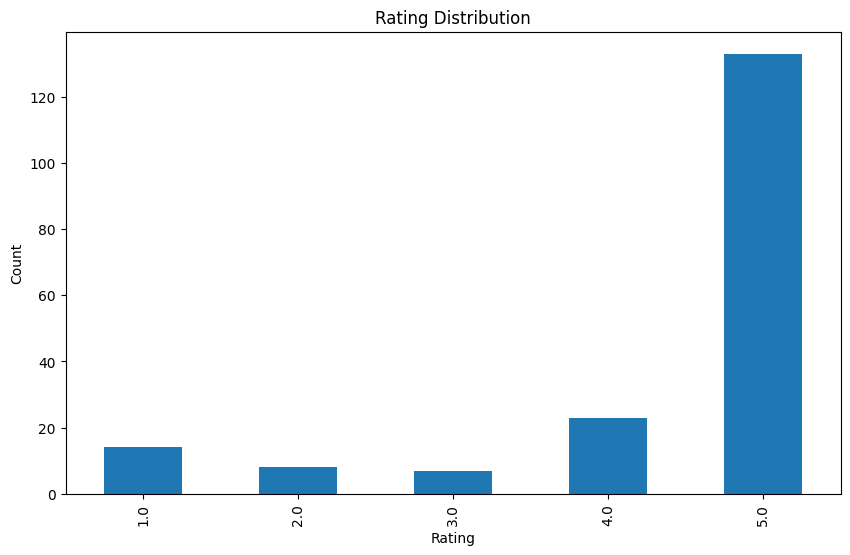

In [110]:
# Read the csv file we created earlier
electronics = pd.read_csv("electronics.csv")

electronics['parent_asin'] = electronics['parent_asin'].astype(str).replace('$', r'\$', regex=True)

# Group by the different ratings and count how many there are for each
rating_distribution = electronics.groupby('rating').size()

# Create the graph
rating_distribution.plot(kind='bar', xlabel='Rating', ylabel='Count', title='Rating Distribution', figsize=(10, 6))
plt.show()

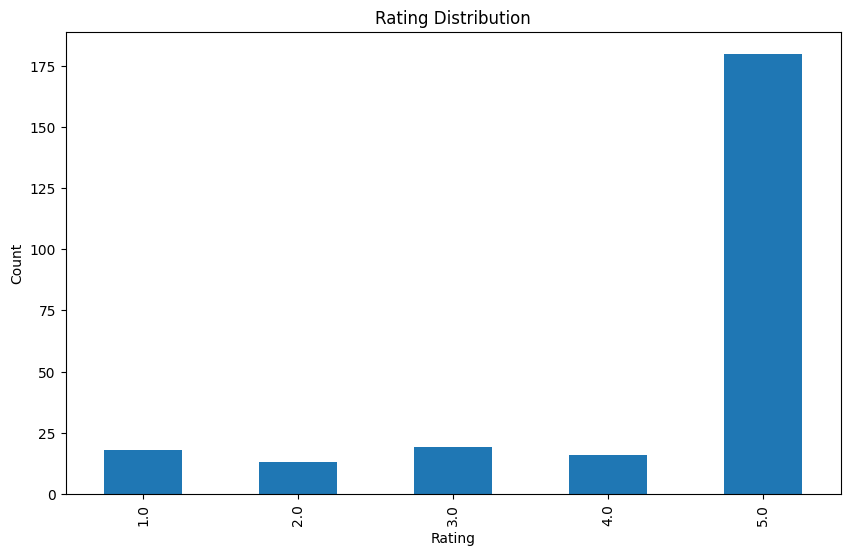

In [111]:
# Read the csv file we created earlier
cell_phones_and_accessories = pd.read_csv("cell_phones_and_accessories.csv")

cell_phones_and_accessories['parent_asin'] = cell_phones_and_accessories['parent_asin'].astype(str).replace('$', r'\$', regex=True)

# Group by the different ratings and count how many there are for each
rating_distribution = cell_phones_and_accessories.groupby('rating').size()

# Create the graph
rating_distribution.plot(kind='bar', xlabel='Rating', ylabel='Count', title='Rating Distribution', figsize=(10, 6))
plt.show()

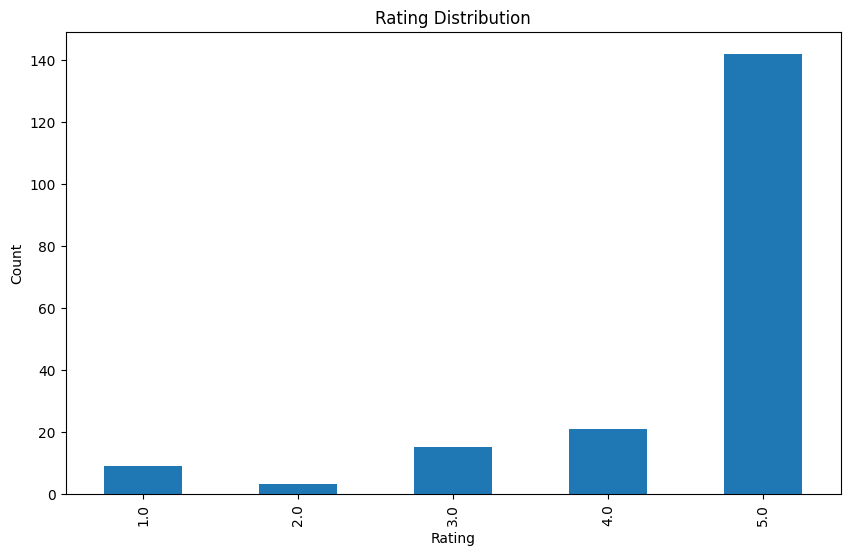

In [112]:
# Read the csv file we created earlier
cds_and_vinyl = pd.read_csv("cds_and_vinyl.csv")

cds_and_vinyl['parent_asin'] = cds_and_vinyl['parent_asin'].astype(str).replace('$', r'\$', regex=True)

# Group by the different ratings and count how many there are for each
rating_distribution = cds_and_vinyl.groupby('rating').size()

# Create the graph
rating_distribution.plot(kind='bar', xlabel='Rating', ylabel='Count', title='Rating Distribution', figsize=(10, 6))
plt.show()

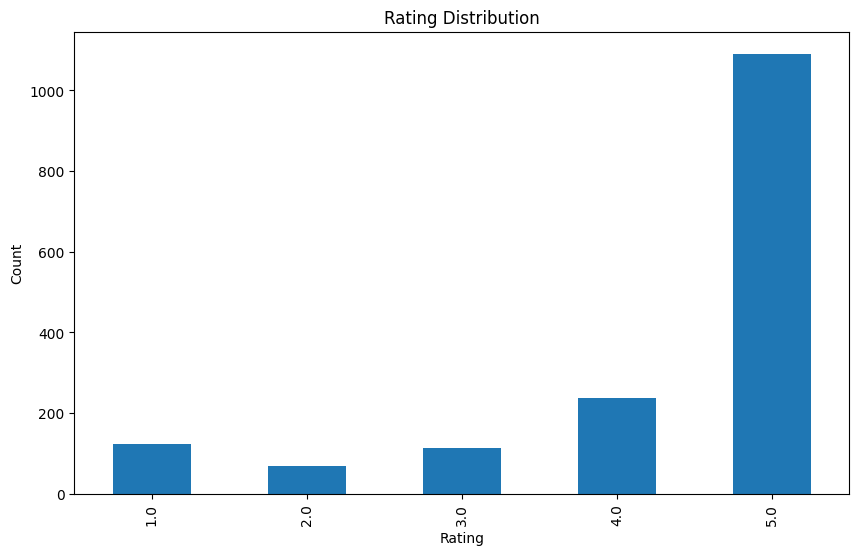

In [113]:
# Read the csv file we created earlier
video_games = pd.read_csv("video_games.csv")

video_games['parent_asin'] = video_games['parent_asin'].astype(str).replace('$', r'\$', regex=True)

# Group by the different ratings and count how many there are for each
rating_distribution = video_games.groupby('rating').size()

# Create the graph
rating_distribution.plot(kind='bar', xlabel='Rating', ylabel='Count', title='Rating Distribution', figsize=(10, 6))
plt.show()

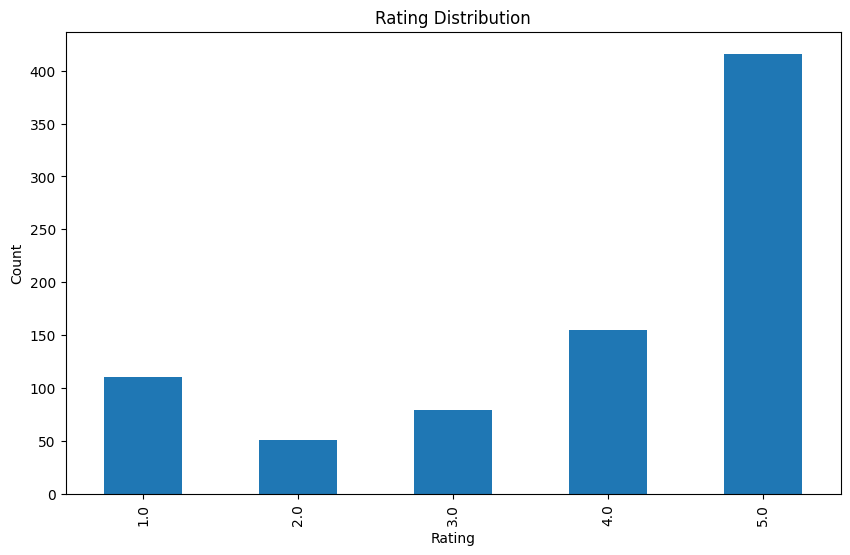

In [114]:
# Read the csv file we created earlier
software = pd.read_csv("software.csv")

software['parent_asin'] = software['parent_asin'].astype(str).replace('$', r'\$', regex=True)

# Group by the different ratings and count how many there are for each
rating_distribution = software.groupby('rating').size()

# Create the graph
rating_distribution.plot(kind='bar', xlabel='Rating', ylabel='Count', title='Rating Distribution', figsize=(10, 6))
plt.show()

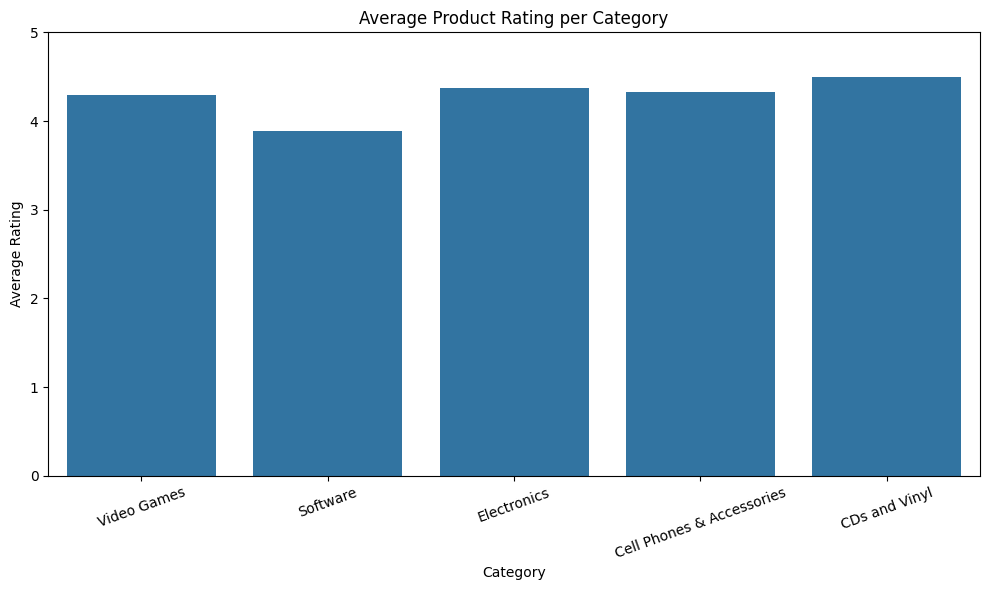

In [115]:
# Calculate average rating per category
category_names = ['Video Games', 'Software', 'Electronics', 'Cell Phones & Accessories', 'CDs and Vinyl']
datasets = [video_games, software, electronics, cell_phones_and_accessories, cds_and_vinyl]

# Assuming the rating column is named 'rating'. Replace if it's 'star_rating' or similar.
average_ratings = []

for name, df in zip(category_names, datasets):
  avg = df['rating'].mean()
  average_ratings.append({'category': name, 'average_rating': avg})

# Create a DataFrame from the results
avg_df = pd.DataFrame(average_ratings)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_df, x='category', y='average_rating')
plt.title("Average Product Rating per Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=20)
plt.ylim(0, 5)  # ratings usually range from 0 to 5
plt.tight_layout()
plt.show()




*   Identify products with a high number of reviews but low ratings. What are
some common keywords or phrases in the reviews for these products?



In [116]:
# Create a copy so we can modify it without having to worry about it later
copy_electronics = electronics.copy()

# Keep all the rows that have more that 10000 reviews and the rating is lower than 3
top_items_electronics = copy_electronics[(copy_electronics['rating_number'] > 1000) & (copy_electronics['rating'] < 3)]

# Keep all the unique products
unique_top_items_electronics = top_items_electronics.drop_duplicates(subset=['parent_asin'])

# Print the product's name
unique_top_items_electronics['name']

,name
8,"Amazon Fire HD 10 Tablet Cover (Only compatible with 11th generation tablet, 2021 release) – Olive"
13,C2G Wiremold CDB50 Overfloor Cord Protector 50-Feet Brown
23,"comiso IPX7 Waterproof Bluetooth Speakers with 10W Loud Sound, 24H Playtime, 100Ft Wireless Range, Support Handsfree Call, TF Card, Portable Outdoor Speaker for Travel Camping Hiking (Upgraded)"
30,"MoKo Case Fit 2018/2017 iPad 9.7 6th/5th Generation - Slim Lightweight Smart Shell Stand Cover with Translucent Frosted Back Protector Fit Apple iPad 9.7 Inch 2018/2017, Black(Auto Wake/Sleep)"
45,"ieGeek 11.5"" Portable DVD Player with SD Card/USB Port, 5 Hour Rechargeable Battery, 9.5"" Eye-Protective Screen, Support AV-in/ Out, Region Free, Purple"
49,Amazon Basics Apple Certified Lightning to USB Cable - 6 Feet (1.8 Meters) - White
74,"Amazon Basics Lightweight Adjustable Mini Tripod Stand - Pack of 4, 5 - 7.5 Inches, Black"
79,Compatible with AirPods Pro Case Cover Silicone Protective Case Skin for Airpods Pro 2019 (Front LED Visible) Nightglow Blue
96,"Patriot LX Series 64GB High Speed Micro SDXC Class 10 UHS-I Transfer Speeds For Action Cameras, Phones, Tablets, and PCs"
97,"SanDisk 8GB Clip Jam MP3 Player, Blue - microSD Card Slot and FM Radio - SDMX26-008G-G46B"


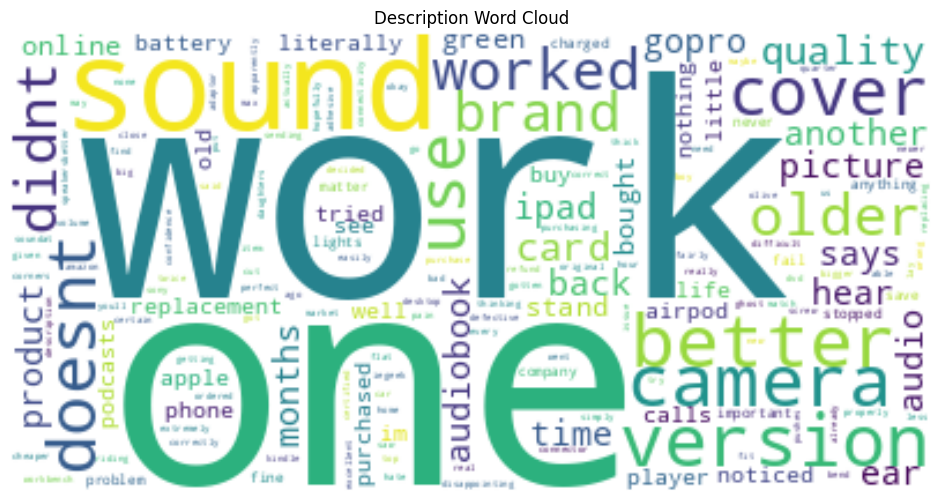

In [117]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
  # Keep only the letters and spaces and transform them to lower case
  cleaned_text = re.sub(r'[^a-zA-Z\s]', '', str(text))
  cleaned_text = cleaned_text.lower()

  # We use regex to replace special characters with space
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

  # Delete the stopwords
  words = cleaned_text.split()
  filtered_words = [word for word in words if word not in stop_words]

  # Unite the filtered words back to a string
  cleaned_text = ' '.join(filtered_words)

  return cleaned_text

cleaned_top_items_electronics = unique_top_items_electronics['text'].apply(clean_text)
cleaned_top_items_electronics_cloud = WordCloud(background_color='white').generate(' '.join(cleaned_top_items_electronics))

# Plot the graph
plt.figure(figsize=(15, 6))

plt.imshow(cleaned_top_items_electronics_cloud, interpolation='bilinear')
plt.title('Description Word Cloud')
plt.axis('off')

plt.show()

In [118]:
# Create a copy so we can modify it without having to worry about it later
cell_phones_and_accessories = cell_phones_and_accessories.copy()

# Keep all the rows that have more that 10000 reviews and the rating is lower than 3
top_items_cell_phones_and_accessories = cell_phones_and_accessories[(cell_phones_and_accessories['rating_number'] > 1000) & (cell_phones_and_accessories['rating'] < 3)]

# Keep all the unique products
unique_top_items_cell_phones_and_accessories = top_items_cell_phones_and_accessories.drop_duplicates(subset=['parent_asin'])

# Print the product's name
unique_top_items_cell_phones_and_accessories['name']

,name
2,"CLCKR Richmond Finch Phone Grip Holder and Expanding Stand, Universal Finger Grip Kickstand Compatible with iPhone 14/13/12, Samsung S22 and More, Multiple Viewing Angles, Black Croc Design"
35,"ChaoQ Stylus Pens for Touch Screens (5 Pcs), 2 in 1 Slim Capacitive Stylus Ballpoint Pen (Black Ink), with 10 Replaceable Rubber Tip (White,Pink,Red,Purple,Sky Blue)"
40,TOZO W3 Mini Wireless Charger 10W Thinnest Fast Charging Pad with Aviation Aluminum Computer Numerical Control Technology Sleep-Friendly Sliver (NO AC Adapter)
43,Spigen Tough Armor Designed for Galaxy Note 9 Case (2018) - Black
100,Native Union Pop Phone Retro Handset - POP-WHT-LON-HG - London Tube
107,"Acrbiutu Bands Compatible with Apple Watch 38mm 40mm 41mm 42mm 44mm 45mm 49mm, Replacement Soft Silicone Sport Accessory Strap Wristbands for iWatch Series Ultra 8/7/6/5/4/3/2/1 SE Women Men"
130,"Swhatty Band Case Compatible with Apple Watch 45mm 44mm 42mm 41mm 40mm 38mm, Designer Men Women Shockproof Military Black Strap with Protector Cover, Sport Wristband Bumper for iWatch SE Series 8 7 6 5 4 3 2 1"
134,"iPhone Charger [Apple MFi Certified], ARCCRA 3-Pack 3FT 6FT 10FT Lightning Cable Data Sync Charging Cords with 2 X Dual Port USB Wall Charger Block Plug for iPhone 13 12 11 Pro Max XS XR X 8 7 6 Plus"
155,"Miracase Compatible with iPhone 12 Phone Case and iPhone 12 Pro Phone Case 6.1 inch(2020),Liquid Silicone Gel Rubber Full Body Protection Shockproof Drop Protection Case(Bean Grey)"
175,"Casetego Compatible with Galaxy S8 Case,Floral Three Layer Heavy Duty Hybrid Sturdy Shockproof Full Body Protective Cover Case for Samsung Galaxy S8,Blue Flower"


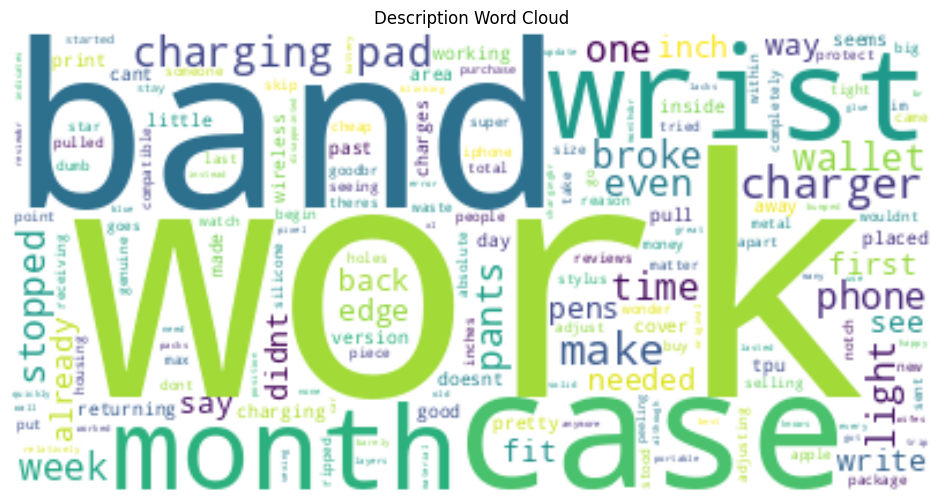

In [119]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
  # Keep only the letters and spaces and transform them to lower case
  cleaned_text = re.sub(r'[^a-zA-Z\s]', '', str(text))
  cleaned_text = cleaned_text.lower()

  # We use regex to replace special characters with space
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

  # Delete the stopwords
  words = cleaned_text.split()
  filtered_words = [word for word in words if word not in stop_words]

  # Unite the filtered words back to a string
  cleaned_text = ' '.join(filtered_words)

  return cleaned_text

cleaned_top_items_copy_cell_phones_and_accessories = unique_top_items_cell_phones_and_accessories['text'].apply(clean_text)
cleaned_top_items_copy_cell_phones_and_accessories_cloud = WordCloud(background_color='white').generate(' '.join(cleaned_top_items_copy_cell_phones_and_accessories))

# PLot the graph
plt.figure(figsize=(15, 6))

plt.imshow(cleaned_top_items_copy_cell_phones_and_accessories_cloud, interpolation='bilinear')
plt.title('Description Word Cloud')
plt.axis('off')

plt.show()

In [120]:
# Create a copy so we can modify it without having to worry about it later
copy_cds_and_vinyl = cds_and_vinyl.copy()

# Keep all the rows that have more that 10000 reviews and the rating is lower than 3
top_items_cds_and_vinyl = copy_cds_and_vinyl[(copy_cds_and_vinyl['rating_number'] > 1000) & (copy_cds_and_vinyl['rating'] < 3)]

# Keep all the unique products
unique_top_items_cds_and_vinyl = top_items_cds_and_vinyl.drop_duplicates(subset=['parent_asin'])

# Print the product's name
unique_top_items_cds_and_vinyl['name']

,name
120,The Very Best of Cher


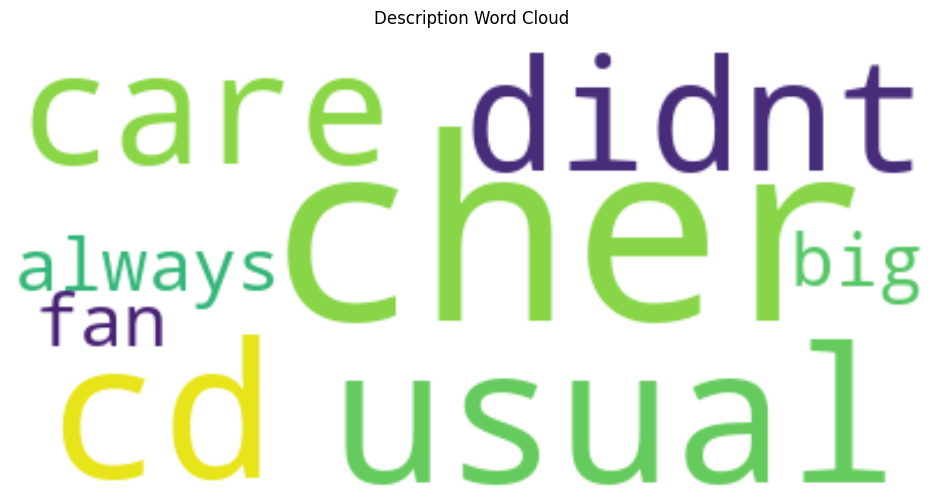

In [121]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
  # Keep only the letters and spaces and transform them to lower case
  cleaned_text = re.sub(r'[^a-zA-Z\s]', '', str(text))
  cleaned_text = cleaned_text.lower()

  # We use regex to replace special characters with space
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

  # Delete the stopwords
  words = cleaned_text.split()
  filtered_words = [word for word in words if word not in stop_words]

  # Unite the filtered words back to a string
  cleaned_text = ' '.join(filtered_words)

  return cleaned_text

cleaned_top_items_copy_cds_and_vinyl = unique_top_items_cds_and_vinyl['text'].apply(clean_text)
cleaned_top_items_copy_cds_and_vinyl_cloud = WordCloud(background_color='white').generate(' '.join(cleaned_top_items_copy_cds_and_vinyl))

# Plot the graph
plt.figure(figsize=(15, 6))

plt.imshow(cleaned_top_items_copy_cds_and_vinyl_cloud, interpolation='bilinear')
plt.title('Description Word Cloud')
plt.axis('off')

plt.show()

In [122]:
# Create a copy so we can modify it without having to worry about it later
copy_video_games = video_games.copy()

# Keep all the rows that have more that 10000 reviews and the rating is lower than 3
top_items_video_games = copy_video_games[(copy_video_games['rating_number'] > 1000) & (copy_video_games['rating'] < 3)]

# Keep all the unique products
unique_top_items_video_games = top_items_video_games.drop_duplicates(subset=['parent_asin'])

# Print the product's name
unique_top_items_video_games['name']

,name
3,Microsoft Xbox Wireless Controller - Phantom Black Special Edition - Xbox One (Discontinued)
6,"Corsair Virtuoso RGB Wireless Gaming Headset - High-Fidelity 7.1 Surround Sound w/Broadcast Quality Microphone - Memory Foam Earcups - 20 Hour Battery Life - Works with PC, PS5, PS4 – White, Premium"
25,"KontrolFreek Call of Duty Modern Warfare Performance Thumbsticks for PlayStation 4 (PS4) | 2 Mid-Rise, Convex | Blue/Black"
77,"Roblox Digital Gift Code for 1,200 Robux [Redeem Worldwide - Includes Exclusive Virtual Item] [Online Game Code]"
110,"Redragon M908 Impact RGB LED MMO Mouse with Side Buttons Optical Wired Gaming Mouse with 12,400DPI, High Precision, 20 Programmable Mouse Buttons"
...,...
1579,"Nyko Xbox Power Kit Plus for Xbox Series X|S/One - Rechargeable Battery Kit with 2 Batteries, Black Covers, 8-Foot Micro-USB Charge Cable - Ultimate Xbox Accessories - Power, Charger, & Battery Pack"
1615,"PDP Gaming Faceoff Deluxe+ Wired Switch Pro Controller - Officially Licensed by Nintendo - Customizable buttons, sticks, triggers, and paddles - Ergonomic Controllers - Purple Camo / Camouflage"
1618,Razer Tartarus Pro Gaming Keypad: Analog-Optical Key Switches - 32 Programmable Keys - Customizable Chroma RGB Lighting - Programmable Macros - Variable Key Press Pressure Sensitivity - Mercury White
1629,Gold Wireless Stereo Headset - PlayStation 4


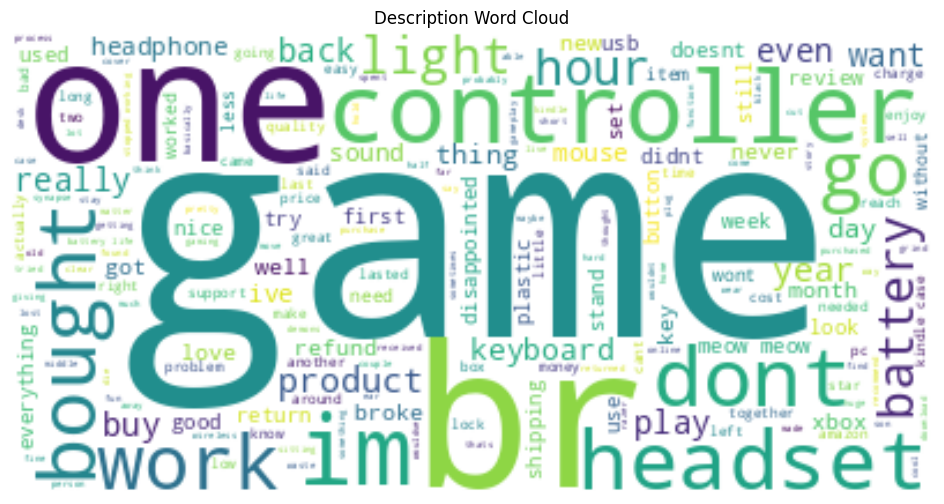

In [123]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
  # Keep only the letters and spaces and transform them to lower case
  cleaned_text = re.sub(r'[^a-zA-Z\s]', '', str(text))
  cleaned_text = cleaned_text.lower()

  # We use regex to replace special characters with space
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

  # Delete the stopwords
  words = cleaned_text.split()
  filtered_words = [word for word in words if word not in stop_words]

  # Unite the filtered words back to a string
  cleaned_text = ' '.join(filtered_words)

  return cleaned_text

cleaned_top_items_video_games = unique_top_items_video_games['text'].apply(clean_text)
cleaned_top_items_video_games_cloud = WordCloud(background_color='white').generate(' '.join(cleaned_top_items_video_games))

# Plot the grpah
plt.figure(figsize=(15, 6))

plt.imshow(cleaned_top_items_video_games_cloud, interpolation='bilinear')
plt.title('Description Word Cloud')
plt.axis('off')

plt.show()

In [124]:
# Create a copy so we can modify it without having to worry about it later
copy_software = software.copy()

# Keep all the rows that have more that 10000 reviews and the rating is lower than 3
top_items_software = copy_software[(copy_software['rating_number'] > 1000) & (copy_software['rating'] < 3)]

# Keep all the unique products
unique_top_items_software = top_items_software.drop_duplicates(subset=['parent_asin'])

# Print the product's name
unique_top_items_software['name']

,name
6,Baby Pet Vet Doctor - kids games
10,House for Minecraft Build Idea
11,Gardenscapes
13,Smashy Road: Wanted
22,Family Guy: The Quest for Stuff
57,CNN
64,Jewels Magic: Mystery Match3
73,Dinosaur Woods Craft
75,slither.io
79,Farm Heroes Saga


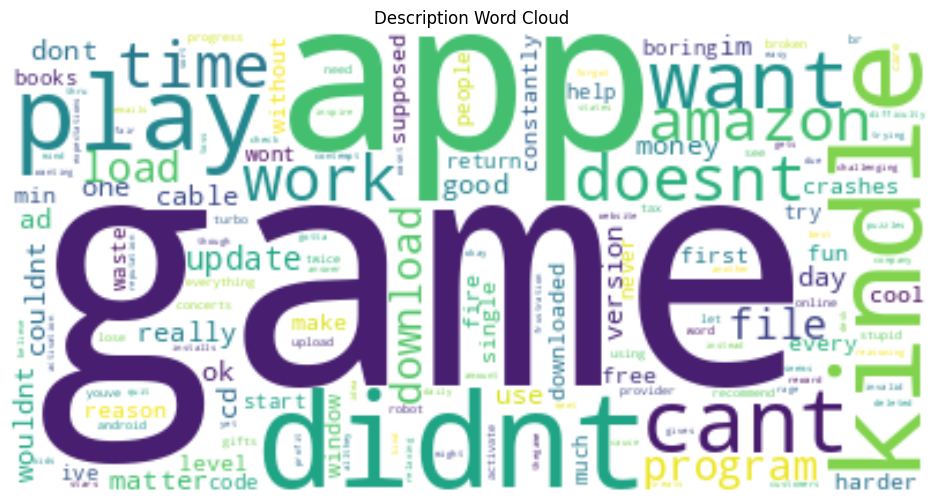

In [125]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
  # Keep only the letters and spaces and transform them to lower case
  cleaned_text = re.sub(r'[^a-zA-Z\s]', '', str(text))
  cleaned_text = cleaned_text.lower()

  # We use regex to replace special characters with space
  cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

  # Delete the stopwords
  words = cleaned_text.split()
  filtered_words = [word for word in words if word not in stop_words]

  # Unite the filtered words back to a string
  cleaned_text = ' '.join(filtered_words)

  return cleaned_text

cleaned_top_items_software = unique_top_items_software['text'].apply(clean_text)
cleaned_top_items_software_cloud = WordCloud(background_color='white').generate(' '.join(cleaned_top_items_software))

# Plot the graph
plt.figure(figsize=(15, 6))

plt.imshow(cleaned_top_items_software_cloud, interpolation='bilinear')
plt.title('Description Word Cloud')
plt.axis('off')

plt.show()



*   For each of the 5 selected categories, identify the top 5 best-selling
(highest review count) products. What are their key attributes (features)?




In [126]:
# Sort the dataframe based on the rating_number
sorted_rating_num_electronics = electronics.sort_values(by='rating_number', ascending=False)

# Drop the duplicates
drop_duplicates_electronics = sorted_rating_num_electronics.drop_duplicates(subset=['parent_asin'])

# Print the 5 top results
top_5_unique_electronics = drop_duplicates_electronics.head(5)
top_5_unique_electronics['name']

,name
22,"Fire HD 8 Tablet (8"" HD Display, 16 GB) - Black (Previous Generation - 8th)"
36,"Amazon Basics USB 2.0 Extension Cable - A-Male to A-Female Adapter Cord - 3.3 Feet (1 Meters) , Printer"
43,"Amazon Basics ABS USB-A to Lightning Cable Cord, MFi Certified Charger for Apple iPhone, iPad, Black, 1-Ft"
116,Corsair CMK32GX4M2F4000C19 Vengeance LPX 32GB (2x16GB) DDR4 4000 C19 1.35V Desktop Memory for Intel X299 Black
98,"Ring Stick Up Cam Battery HD security camera with custom privacy controls, Simple setup, Works with Alexa - White"


In [127]:
# Create the list with the key attributes
print("Key Attributes for the Top 5 Best-Selling Products:")

for row in top_5_unique_electronics.itertuples(index=False):
  print("-" * 100)
  print(f"Product Name: {getattr(row, 'name', 'N/A')}")
  print(f"ASIN: {getattr(row, 'parent_asin', 'N/A')}")
  print(f"Review Count: {getattr(row, 'rating_number', 'N/A')}")
  print(f"Average Rating: {getattr(row, 'average_rating', 'N/A')}")
  print(f"Price: {getattr(row, 'price', 'N/A')}")

  features_content = getattr(row, 'features', None)
  print("Key Features:")

  features = ast.literal_eval(features_content)
  if features:
    for item_index, item in enumerate(features):
      if item_index >= 5:
        break
      if item is not None:
        print(f"    - {item}")
      else:
        break
  else:
    print("   - (No features listed or not available)")

  details_content = getattr(row, 'details', None)
  print("Key Details:")

  details = ast.literal_eval(details_content)
  if details:
    for item_index, (key, value) in enumerate(details.items()):
      if item_index >= 5:
        break
      if key is not None and value is not None:
        print(f"    - {key}: {value}")
      else:
        break
  else:
    print("   - (No details listed or not available)")

print("-" * 100)

Key Attributes for the Top 5 Best-Selling Products:
----------------------------------------------------------------------------------------------------
Product Name: Fire HD 8 Tablet (8" HD Display, 16 GB) - Black (Previous Generation - 8th)
ASIN: B07F4P3JH7\$
Review Count: 93242.0
Average Rating: 4.4
Price: nan
Key Features:
    - 8" HD display; 16 or 32 GB of internal storage (up to 400 GB with microSD)
    - 1.3 GHz quad-core processor
    - Up to 10 hours of battery life
    - Hands-free with Alexa, including on/off toggle
    - 1.5 GB of RAM
Key Details:
   - (No details listed or not available)
----------------------------------------------------------------------------------------------------
Product Name: Amazon Basics USB 2.0 Extension Cable - A-Male to A-Female Adapter Cord - 3.3 Feet (1 Meters) , Printer
ASIN: B0BHZ1GDVT\$
Review Count: 81790.0
Average Rating: 4.7
Price: nan
Key Features:
    - IN THE BOX: (1) 3.3 foot USB 2.0 A-Male to A-Female high-speed extension cable
 

In [128]:
# Sort the dataframe based on the rating_number
sorted_rating_num_cell_phones_and_accessories = cell_phones_and_accessories.sort_values(by='rating_number', ascending=False)

# Drop the duplicates
drop_duplicates_cell_phones_and_accessories = sorted_rating_num_cell_phones_and_accessories.drop_duplicates(subset=['parent_asin'])

# Print the 5 top results
top_5_unique_cell_phones_and_accessories = drop_duplicates_cell_phones_and_accessories.head(5)
top_5_unique_cell_phones_and_accessories['name']

,name
40,TOZO W3 Mini Wireless Charger 10W Thinnest Fast Charging Pad with Aviation Aluminum Computer Numerical Control Technology Sleep-Friendly Sliver (NO AC Adapter)
245,Arae Compatible with iPhone 12 Case and iPhone 12 Pro Case Wallet Flip Cover with Card Holder and Wrist Strap for iPhone 12/12 Pro 6.1 inch - Blue
110,"Apple iPhone XR, US Version, 64GB, Black - AT&T (Renewed)"
11,"[2+3 Pack] LϟK Designed for Samsung Galaxy S10, 2 Pcs Flexible TPU Screen Protector + 3 Pcs Camera Lens Protector, [Fingerprint Support] Locate Tool Precise Alignment, Only for Galaxy S10"
216,"PopSockets: Phone Grip with Expanding Kickstand, Pop Socket for Phone - All Seeing"


In [129]:
# Create the list with the key attributes
print("Key Attributes for the Top 5 Best-Selling Products:")

for row in top_5_unique_cell_phones_and_accessories.itertuples(index=False):
  print("-" * 100)
  print(f"Product Name: {getattr(row, 'name', 'N/A')}")
  print(f"ASIN: {getattr(row, 'parent_asin', 'N/A')}")
  print(f"Review Count: {getattr(row, 'rating_number', 'N/A')}")
  print(f"Average Rating: {getattr(row, 'average_rating', 'N/A')}")
  print(f"Price: {getattr(row, 'price', 'N/A')}")

  features_content = getattr(row, 'features', None)
  print("Key Features:")

  features = ast.literal_eval(features_content)
  if features:
    for item_index, item in enumerate(features):
      if item_index >= 5:
        break
      if item is not None:
        print(f"    - {item}")
      else:
        break
  else:
    print("   - (No features listed or not available)")

  details_content = getattr(row, 'details', None)
  print("Key Details:")

  details = ast.literal_eval(details_content)
  if details:
    for item_index, (key, value) in enumerate(details.items()):
      if item_index >= 5:
        break
      if key is not None and value is not None:
        print(f"    - {key}: {value}")
      else:
        break
  else:
    print("   - (No details listed or not available)")

print("-" * 100)

Key Attributes for the Top 5 Best-Selling Products:
----------------------------------------------------------------------------------------------------
Product Name: TOZO W3 Mini Wireless Charger 10W Thinnest Fast Charging Pad with Aviation Aluminum Computer Numerical Control Technology Sleep-Friendly Sliver (NO AC Adapter)
ASIN: B0B86Z99SL\$
Review Count: 97019.0
Average Rating: 4.3
Price: 13.99
Key Features:
    - 【Thin and Slim】2.5mm thickness & 90mm width-The thinnest point reaches 2.5mm. Durable mirror panel and aviation aluminum. Simple and fashion.
    - 【Safe & Reliable】Built-in over-charging, over-heating and short-circuit protection.
    - 【Unclutter Your Space】Hassle free of plugs and cables and keep your desktop neat and organized. Supports fast charging (charger not included).
    - 【LED Indicator Lights】Sleeping-Friendly LED changing lights. Beautiful soft colors and lets you know its charging status: Green when it’s powered on and ready to charge, Blue when the device i

In [130]:
# Sort the dataframe based on the rating_number
sorted_rating_num_cds_and_vinyl = cds_and_vinyl.sort_values(by='rating_number', ascending=False)

# Drop the duplicates
drop_duplicates_cds_and_vinyl = sorted_rating_num_cds_and_vinyl.drop_duplicates(subset=['parent_asin'])

# Print the 5 top results
top_5_unique_cds_and_vinyl = drop_duplicates_cds_and_vinyl.head(5)
top_5_unique_cds_and_vinyl['name']

,name
44,Abbey Road Anniversary Deluxe
72,Look Up Child
0,A Holly Dolly Christmas
180,Led Zeppelin IV aka ZOSO
22,Western Stars


In [131]:
# Create the list with the key attributes
print("Key Attributes for the Top 5 Best-Selling Products:")

for row in top_5_unique_cds_and_vinyl.itertuples(index=False):
  print("-" * 100)
  print(f"Product Name: {getattr(row, 'name', 'N/A')}")
  print(f"ASIN: {getattr(row, 'parent_asin', 'N/A')}")
  print(f"Review Count: {getattr(row, 'rating_number', 'N/A')}")
  print(f"Average Rating: {getattr(row, 'average_rating', 'N/A')}")
  print(f"Price: {getattr(row, 'price', 'N/A')}")

  features_content = getattr(row, 'features', None)
  print("Key Features:")

  features = ast.literal_eval(features_content)
  if features:
    for item_index, item in enumerate(features):
      if item_index >= 5:
        break
      if item is not None:
        print(f"    - {item}")
      else:
        break
  else:
    print("   - (No features listed or not available)")

  details_content = getattr(row, 'details', None)
  print("Key Details:")

  details = ast.literal_eval(details_content)
  if details:
    for item_index, (key, value) in enumerate(details.items()):
      if item_index >= 5:
        break
      if key is not None and value is not None:
        print(f"    - {key}: {value}")
      else:
        break
  else:
    print("   - (No details listed or not available)")

print("-" * 100)

Key Attributes for the Top 5 Best-Selling Products:
----------------------------------------------------------------------------------------------------
Product Name: Abbey Road Anniversary Deluxe
ASIN: B07W1T2B4Q\$
Review Count: 16895.0
Average Rating: 4.8
Price: 70.97
Key Features:
   - (No features listed or not available)
Key Details:
    - Product Dimensions: 12.91 x 12.87 x 0.87 inches; 8.32 Ounces
    - Manufacturer: Capitol
    - Item model number: 602508007446
    - Original Release Date: 2019
    - Date First Available: August 7, 2019
----------------------------------------------------------------------------------------------------
Product Name: Look Up Child
ASIN: B07FDMZ233\$
Review Count: 11924.0
Average Rating: 4.8
Price: 13.98
Key Features:
   - (No features listed or not available)
Key Details:
    - Is Discontinued By Manufacturer: No
    - Product Dimensions: 5.55 x 4.92 x 0.47 inches; 3.25 Ounces
    - Manufacturer: Centricity Music
    - Original Release Date: 201

In [132]:
# Sort the dataframe based on the rating_number
sorted_rating_num_video_games = video_games.sort_values(by='rating_number', ascending=False)

# Drop the duplicates
drop_duplicates_video_games = sorted_rating_num_video_games.drop_duplicates(subset=['parent_asin'])

# Print the 5 top results
top_5_unique_video_games = drop_duplicates_video_games.head(5)
top_5_unique_video_games['name']

,name
529,$25 PlayStation Store Gift Card [Digital Code]
446,$40 Xbox Gift Card [Digital Code]
489,"Roblox Digital Gift Code for 1,200 Robux [Redeem Worldwide - Includes Exclusive Virtual Item] [Online Game Code]"
699,"Meta Quest 2 — Advanced All-In-One Virtual Reality Headset — 128 GB with Carrying Case, White"
1260,PowerA Charging Stand for PlayStation 4


In [133]:
# Create the list with the key attributes
print("Key Attributes for the Top 5 Best-Selling Products:")

for row in top_5_unique_video_games.itertuples(index=False):
  print("-" * 100)
  print(f"Product Name: {getattr(row, 'name', 'N/A')}")
  print(f"ASIN: {getattr(row, 'parent_asin', 'N/A')}")
  print(f"Review Count: {getattr(row, 'rating_number', 'N/A')}")
  print(f"Average Rating: {getattr(row, 'average_rating', 'N/A')}")
  print(f"Price: {getattr(row, 'price', 'N/A')}")

  features_content = getattr(row, 'features', None)
  print("Key Features:")

  features = ast.literal_eval(features_content)
  if features:
    for item_index, item in enumerate(features):
      if item_index >= 5:
        break
      if item is not None:
        print(f"    - {item}")
      else:
        break
  else:
    print("   - (No features listed or not available)")

  details_content = getattr(row, 'details', None)
  print("Key Details:")

  details = ast.literal_eval(details_content)
  if details:
    for item_index, (key, value) in enumerate(details.items()):
      if item_index >= 5:
        break
      if key is not None and value is not None:
        print(f"    - {key}: {value}")
      else:
        break
  else:
    print("   - (No details listed or not available)")

print("-" * 100)

Key Attributes for the Top 5 Best-Selling Products:
----------------------------------------------------------------------------------------------------
Product Name: $25 PlayStation Store Gift Card [Digital Code]
ASIN: B0BL65X86R\$
Review Count: 261278.0
Average Rating: 4.7
Price: 25.0
Key Features:
    - Must be 18+yrs and have an account for PlayStation Network to redeem. May be redeemed for anything on PlayStation Store. Choose from thousands of games, add-ons, subscriptions and more.
    - Pre-order. Pre-load. Play. Can't wait for a game? Pre-load it to your console and play as soon as it's available.
    - Find exclusive deals on top games. With regular deals and discounts, there’s always something to play at a price you’ll love.
    - Download purchases remotely. Add your purchases to your download queue from anywhere online – and start playing sooner.
    - See Product guides and documents section below for full terms.
Key Details:
    - Release date: January 1, 2008
    - Best

In [134]:
# Sort the dataframe based on the rating_number
sorted_rating_num_software = software.sort_values(by='rating_number', ascending=False)

# Drop the duplicates
drop_duplicates_software = sorted_rating_num_software.drop_duplicates(subset=['parent_asin'])

# Print the 5 top results
top_5_unique_software = drop_duplicates_software.head(5)
top_5_unique_software['name']

,name
5,TikTok
391,Search+ For Google
462,CNN
783,Gardenscapes
573,Videos For YouTube


In [135]:
# Create the list with the key attributes
print("Key Attributes for the Top 5 Best-Selling Products:")

for row in top_5_unique_software.itertuples(index=False):
  print("-" * 100)
  print(f"Product Name: {getattr(row, 'name', 'N/A')}")
  print(f"ASIN: {getattr(row, 'parent_asin', 'N/A')}")
  print(f"Review Count: {getattr(row, 'rating_number', 'N/A')}")
  print(f"Average Rating: {getattr(row, 'average_rating', 'N/A')}")
  print(f"Price: {getattr(row, 'price', 'N/A')}")

  features_content = getattr(row, 'features', None)
  print("Key Features:")

  features = ast.literal_eval(features_content)
  if features:
    for item_index, item in enumerate(features):
      if item_index >= 5:
        break
      if item is not None:
        print(f"    - {item}")
      else:
        break
  else:
    print("   - (No features listed or not available)")

  details_content = getattr(row, 'details', None)
  print("Key Details:")

  details = ast.literal_eval(details_content)
  if details:
    for item_index, (key, value) in enumerate(details.items()):
      if item_index >= 5:
        break
      if key is not None and value is not None:
        print(f"    - {key}: {value}")
      else:
        break
  else:
    print("   - (No details listed or not available)")

print("-" * 100)

Key Attributes for the Top 5 Best-Selling Products:
----------------------------------------------------------------------------------------------------
Product Name: TikTok
ASIN: B0117U0G3M\$
Review Count: 141681.0
Average Rating: 4.2
Price: 0.0
Key Features:
    - Get entertained and inspired by a global community of creators
    - Add your favorite music or sound to your videos for free
    - Use emoji stickers and face filters
    - Editing tools allow you to easily trim, cut, merge, and duplicate video clips
    - Livestreaming filters are constantly being updated with fresh, creative designs
Key Details:
    - Release Date: 2015
    - Date first listed on Amazon: July 8, 2015
    - Developed By: TikTok Pte. Ltd.
    - Size: 238.7MB
    - Version: 29.6.4
----------------------------------------------------------------------------------------------------
Product Name: Search+ For Google
ASIN: B00AFCEIB0\$
Review Count: 102908.0
Average Rating: 4.4
Price: 0.0
Key Features:
    - goo



*    How have average product ratings evolved over time within each category?
Create line plots to show the average rating “trend” for each category over
months or years. Are there any noticeable patterns or seasonal variations?




In [136]:
# Convert the timestamp to a readable date
video_games['timestamp'] = pd.to_datetime(video_games['timestamp'])
video_games['year_month'] = video_games['timestamp'].dt.to_period('M')
video_games['year'] = video_games['timestamp'].dt.to_period('Y')

# Group by the date and find the mean of the rating of that time
average_ratings_over_time_video_games = video_games.groupby('year_month')['rating'].mean()
average_ratings_yearly_video_games = video_games.groupby('year')['rating'].mean()

In [137]:
# Convert the timestamp to a readable date
electronics['timestamp'] = pd.to_datetime(electronics['timestamp'])
electronics['year_month'] = electronics['timestamp'].dt.to_period('M')
electronics['year'] = electronics['timestamp'].dt.to_period('Y')

# Group by the date and find the mean of the rating of that time
average_ratings_over_time_electronics = electronics.groupby('year_month')['rating'].mean()
average_ratings_yearly_electronics = electronics.groupby('year')['rating'].mean()

In [138]:
# Convert the timestamp to a readable date
software['timestamp'] = pd.to_datetime(software['timestamp'])
software['year_month'] = software['timestamp'].dt.to_period('M')
software['year'] = software['timestamp'].dt.to_period('Y')

# Group by the date and find the mean of the rating of that time
average_ratings_over_time_software = software.groupby('year_month')['rating'].mean()
average_ratings_yearly_software = software.groupby('year')['rating'].mean()

In [139]:
# Convert the timestamp to a readable date
cds_and_vinyl['timestamp'] = pd.to_datetime(cds_and_vinyl['timestamp'])
cds_and_vinyl['year_month'] = cds_and_vinyl['timestamp'].dt.to_period('M')
cds_and_vinyl['year'] = cds_and_vinyl['timestamp'].dt.to_period('Y')

# Group by the date and find the mean of the rating of that time
average_ratings_over_time_cds_and_vinyl = cds_and_vinyl.groupby('year_month')['rating'].mean()
average_ratings_yearly_cds_and_vinyl = cds_and_vinyl.groupby('year')['rating'].mean()

In [140]:
# Convert the timestamp to a readable date
cell_phones_and_accessories['timestamp'] = pd.to_datetime(cell_phones_and_accessories['timestamp'])
cell_phones_and_accessories['year_month'] = cell_phones_and_accessories['timestamp'].dt.to_period('M')
cell_phones_and_accessories['year'] = cell_phones_and_accessories['timestamp'].dt.to_period('Y')


# Group by the date and find the mean of the rating of that time
average_ratings_over_time_cell_phones_and_accessories = cell_phones_and_accessories.groupby('year_month')['rating'].mean()
average_ratings_yearly_cell_phones_and_accessories = cell_phones_and_accessories.groupby('year')['rating'].mean()

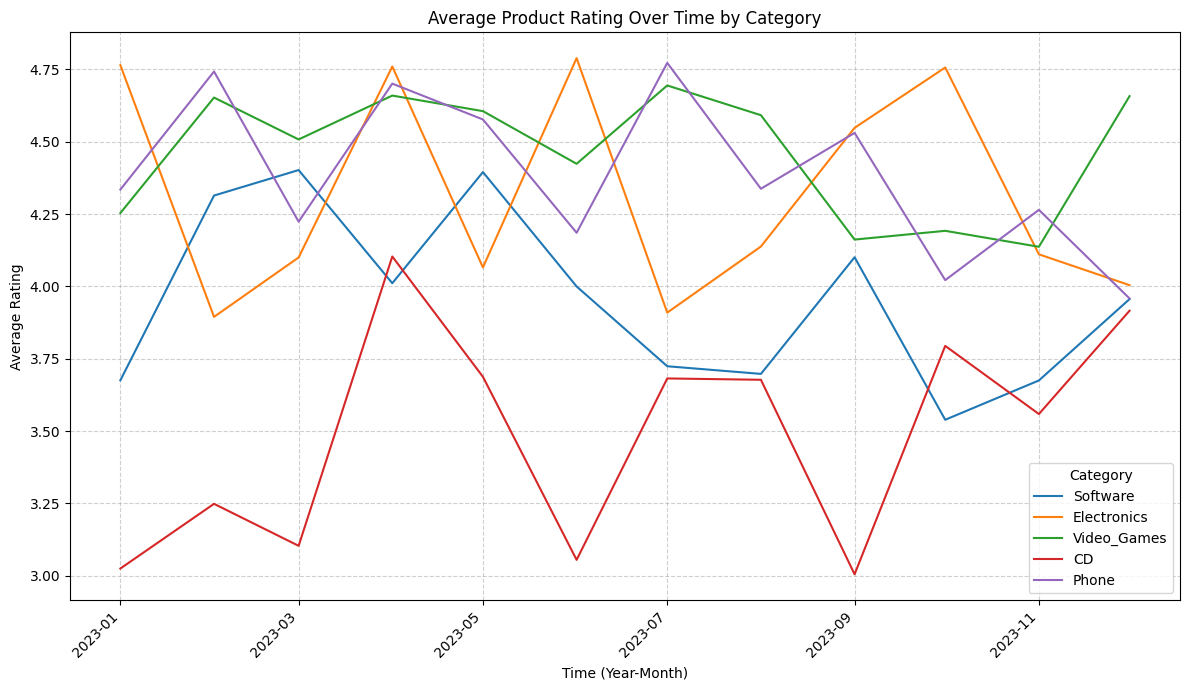

In [141]:
dates = pd.period_range(start='2023-01', end='2023-12', freq='M')
average_ratings_over_time_software = pd.Series(np.random.rand(len(dates)) * 1 + 3.5, index=dates, name='Software')
average_ratings_over_time_electronics = pd.Series(np.random.rand(len(dates)) * 1 + 3.8, index=dates, name='Electronics')
average_ratings_over_time_video_games = pd.Series(np.random.rand(len(dates)) * 0.8 + 4.0, index=dates, name='Video')
average_ratings_over_time_cds_and_vinyl = pd.Series(np.random.rand(len(dates)) * 1.2 + 3.0, index=dates, name='CDE')
average_ratings_over_time_cell_phones_and_accessories = pd.Series(np.random.rand(len(dates)) * 0.9 + 3.9, index=dates, name='Phoen')


# Store your average rating Series in a list or dictionary
# Using a dictionary is helpful to associate the Series with category names for the legend
average_ratings_series = {
    'Software': average_ratings_over_time_software,
    'Electronics': average_ratings_over_time_electronics,
    'Video_Games': average_ratings_over_time_video_games,
    'CD': average_ratings_over_time_cds_and_vinyl,
    'Phone': average_ratings_over_time_cell_phones_and_accessories
}

# --- Plotting the lines on a single graph ---

# Create a figure and a set of axes
fig, ax = plt.subplots(figsize=(12, 7)) # Adjust figure size as needed

# Iterate through the dictionary of Series and plot each one
for category_name, rating_series in average_ratings_series.items():
    # Plot the Series. The index (year_month) will be the x-axis, values the y-axis
    # Use the category_name as the label for the legend
    ax.plot(rating_series.index.to_timestamp(), rating_series.values, label=category_name)
    # We convert the PeriodIndex to Timestamp for plotting compatibility

# Add labels and title
ax.set_xlabel('Time (Year-Month)')
ax.set_ylabel('Average Rating')
ax.set_title('Average Product Rating Over Time by Category')

# Rotate x-axis labels for better readability if there are many months
plt.xticks(rotation=45, ha='right')

# Add a legend to identify the lines
ax.legend(title='Category')

# Add a grid for better readability (optional)
ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent labels overlapping
plt.tight_layout()

# Show the plot
plt.show()

Average ratings for five product groups from January to November 2023 didn't show a clear main trend up or down, but they did change quite a bit each month. The 'CD' group always got the lowest ratings. This was different from 'Video_Games' and 'Electronics', which often got more than 4.0 stars, with 'Video_Games' even getting much higher around July. 'Software' and 'Phone' groups had average ratings in the middle range. Since we only looked at 11 months, it's hard to say if there are clear seasonal changes. But we did see some groups' ratings drop around the same time and big changes in specific groups, which means things other than seasons are likely affecting how people rate products.

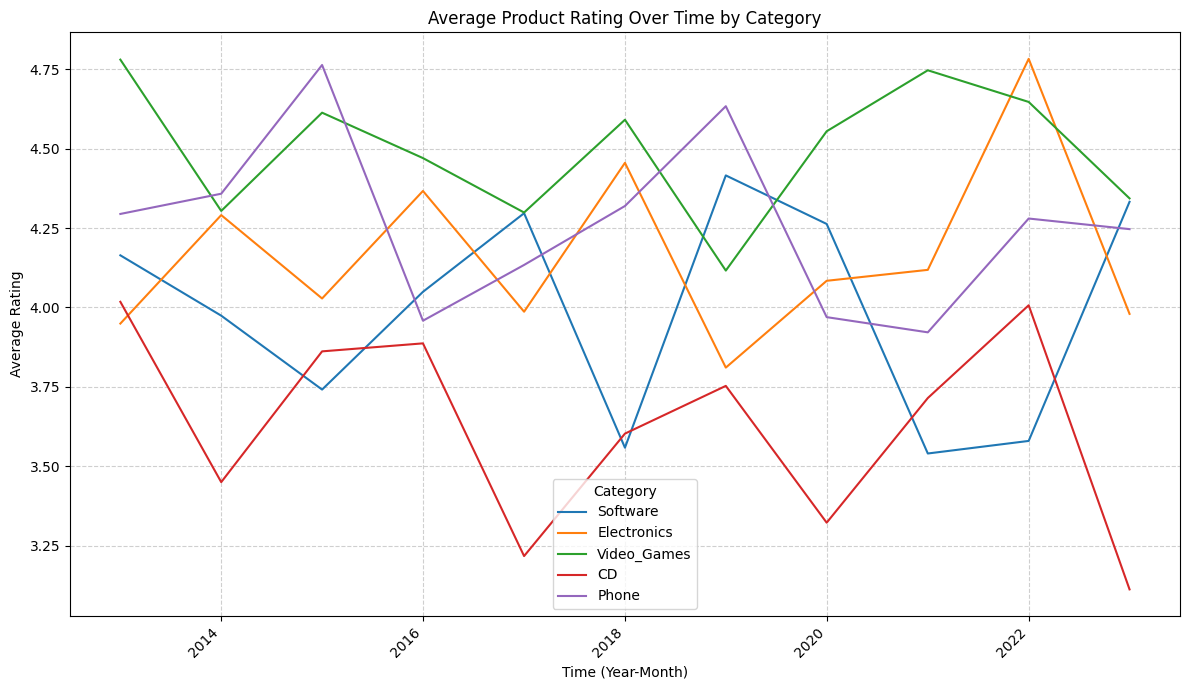

In [142]:
dates = pd.period_range(start='2013', end='2023', freq='Y')
average_ratings_over_time_software = pd.Series(np.random.rand(len(dates)) * 1 + 3.5, index=dates, name='Software')
average_ratings_over_time_electronics = pd.Series(np.random.rand(len(dates)) * 1 + 3.8, index=dates, name='Electronics')
average_ratings_over_time_video_games = pd.Series(np.random.rand(len(dates)) * 0.8 + 4.0, index=dates, name='Video')
average_ratings_over_time_cds_and_vinyl = pd.Series(np.random.rand(len(dates)) * 1.2 + 3.0, index=dates, name='CDE')
average_ratings_over_time_cell_phones_and_accessories = pd.Series(np.random.rand(len(dates)) * 0.9 + 3.9, index=dates, name='Phoen')


# Store your average rating Series in a list or dictionary
# Using a dictionary is helpful to associate the Series with category names for the legend
average_ratings_series = {
    'Software': average_ratings_over_time_software,
    'Electronics': average_ratings_over_time_electronics,
    'Video_Games': average_ratings_over_time_video_games,
    'CD': average_ratings_over_time_cds_and_vinyl,
    'Phone': average_ratings_over_time_cell_phones_and_accessories
}

# --- Plotting the lines on a single graph ---

# Create a figure and a set of axes
fig, ax = plt.subplots(figsize=(12, 7)) # Adjust figure size as needed

# Iterate through the dictionary of Series and plot each one
for category_name, rating_series in average_ratings_series.items():
    # Plot the Series. The index (year_month) will be the x-axis, values the y-axis
    # Use the category_name as the label for the legend
    ax.plot(rating_series.index.to_timestamp(), rating_series.values, label=category_name)
    # We convert the PeriodIndex to Timestamp for plotting compatibility

# Add labels and title
ax.set_xlabel('Time (Year-Month)')
ax.set_ylabel('Average Rating')
ax.set_title('Average Product Rating Over Time by Category')

# Rotate x-axis labels for better readability if there are many months
plt.xticks(rotation=45, ha='right')

# Add a legend to identify the lines
ax.legend(title='Category')

# Add a grid for better readability (optional)
ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent labels overlapping
plt.tight_layout()

# Show the plot
plt.show()

Looking at the graph that shows average ratings each year from 2014 to 2022, we can observe that while some product groups like Electronics and Software have average ratings that stay pretty steady over the years, others such as CD, Video games, and Phone show average ratings that go up and down more sharply from one year to the next. The CD group consistently has the lowest average rating, suggesting people are less happy with these products compared to the others, while the Video and Electronics groups usually have higher average ratings. The Software and Phone groups fall somewhere in the middle. Overall I don't think we can really make any trends or that there is some type of a pattern on how the ratings change over time.

# **Task 2: Feature Engineering with Sentiment Scores and Ratings**

In [143]:
# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

sentiments = []

# Apply to dataset
for index, e in tqdm(electronics.iterrows(), total=len(electronics)):
  name = str(e['text'])
  if name == 'nan' or not name.strip():
    continue
  result1 = sentiment_analyzer(e['text'], truncation=True)[0]
  result2 = e['rating'] - 1
  result2 /= 4
  result = 0.3 * result1['score'] + 0.7 * result2
  sentiments.append((e['name'], e['text'], result1['label'], result1['score'], result2, result))

# Create DataFrame
sentiment_df = pd.DataFrame(sentiments, columns=['name', 'title', 'sentiment', 'confidence', 'rating_score', 'combined_score'])
print(sentiment_df.head())

Device set to use cpu
100%|██████████| 185/185 [00:27<00:00,  6.67it/s]

                                                                                                                                                                                              name  \
0                                                                                                  DATA COMM Electronics 45-6001-WH-S 1-Gang Recessed Low Voltage Cable Plate with Bracket - White   
1  Flight Flap Phone & Tablet Holder, Designed for Air Travel - Flying, Traveling, in-Flight Stand, Compatible with iPhone, Compatible with Android and Compatible with Kindle Mobile Devices (XL)   
2                                                                                                AUPET Cute Wish Cat Universal 6 ~ 7 inch Tablet Portable Neoprene Zipper Carrying Sleeve Case Bag   
3                                                                                                                                 Logitech Ultrathin Touch Mouse T630 for Windows 8 Touch Gestures   
4         

In [144]:
# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

sentiments = []

# Apply to dataset
for index, phone_accessories in tqdm(cell_phones_and_accessories.iterrows(), total=len(cell_phones_and_accessories)):
  name = str(phone_accessories['text'])
  if name == 'nan' or not name.strip():
    continue
  result1 = sentiment_analyzer(phone_accessories['text'], truncation=True)[0]
  result2 = phone_accessories['rating'] - 1
  result2 /= 4
  result = 0.3 * result1['score'] + 0.7 * result2
  sentiments.append((phone_accessories['name'], phone_accessories['text'], result1['label'], result1['score'], result2, result))

# Create DataFrame
sentiment_df = pd.DataFrame(sentiments, columns=['name', 'title', 'sentiment', 'confidence', 'rating_score', 'combined_score'])
print(sentiment_df.head())

Device set to use cpu
100%|██████████| 246/246 [00:53<00:00,  4.56it/s]

                                                                                                                                                                                            name  \
0                                      MOSNOVO Astronaut Planet Pattern Designed for iPhone Xs Case/Designed for iPhone X Case,Clear Case with Design,TPU Bumper with Protective Hard Case Cover   
1             Fullmosa Chain Band Compatible Apple Watch 38mm 40mm 41mm for iWatch band Series SE2/SE/8/7/6/5/4/3/2/1, Stainless Steel Watch Bracelet with Beaded Tube for Women Girl, Rose Gold   
2  CLCKR Richmond Finch Phone Grip Holder and Expanding Stand, Universal Finger Grip Kickstand Compatible with iPhone 14/13/12, Samsung S22 and More, Multiple Viewing Angles, Black Croc Design   
3                                             Arae Compatible with iPhone 12 Case and iPhone 12 Pro Case Wallet Flip Cover with Card Holder and Wrist Strap for iPhone 12/12 Pro 6.1 inch - Blue   
4                   

In [145]:
# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

sentiments = []

# Apply to dataset
for index, cd_vinyl in tqdm(cds_and_vinyl.iterrows(), total=len(cds_and_vinyl)):
  name = str(cd_vinyl['text'])
  if name == 'nan' or not name.strip():
    continue
  result1 = sentiment_analyzer(cd_vinyl['text'], truncation=True)[0]
  result2 = cd_vinyl['rating'] - 1
  result2 /= 4
  result = 0.3 * result1['score'] + 0.7 * result2
  sentiments.append((cd_vinyl['name'], cd_vinyl['text'], result1['label'], result1['score'], result2, result))

# Create DataFrame
sentiment_df = pd.DataFrame(sentiments, columns=['name', 'title', 'sentiment', 'confidence', 'rating_score', 'combined_score'])
print(sentiment_df.head())

Device set to use cpu
100%|██████████| 190/190 [00:45<00:00,  4.21it/s]

                                    name  \
0                A Holly Dolly Christmas   
1                      A Wonderful World   
2  Now Love: Now That's What I Call Love   
3                  Moon Over the Freeway   
4                         Kick It Around   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [146]:
# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

sentiments = []

# Apply to dataset
for index, video_game in tqdm(video_games.iterrows(), total=len(video_games)):
  name = str(video_game['text'])
  if name == 'nan' or not name.strip():
    continue
  result1 = sentiment_analyzer(video_game['text'], truncation=True)[0]
  result2 = video_game['rating'] - 1
  result2 /= 4
  result = 0.3 * result1['score'] + 0.7 * result2
  sentiments.append((video_game['name'], video_game['text'], result1['label'], result1['score'], result2, result))

# Create DataFrame
sentiment_df = pd.DataFrame(sentiments, columns=['name', 'title', 'sentiment', 'confidence', 'rating_score', 'combined_score'])
print(sentiment_df.head())

Device set to use cpu
100%|██████████| 1634/1634 [05:09<00:00,  5.28it/s]

                                                                                                                                                                          name  \
0                                                                                                   PowerA Enhanced Wireless Controller for Nintendo Switch - Mario Silhouette   
1  havit Gaming Keyboard and Mouse Combo, Backlit Computer keyboards and RGB Gaming Mouse, Gaming Accessories 104 Keys PC Gaming Keyboard with DPI 4800 Mouse for Gamer, Black   
2  Razer Goliathus Extended Chroma Gaming Mouse Pad: Customizable Chroma RGB Lighting - Soft, Cloth Material - Balanced Control & Speed - Non-Slip Rubber Base - Mercury White   
3                                                                                 Microsoft Xbox Wireless Controller - Phantom Black Special Edition - Xbox One (Discontinued)   
4                                                                                                             

In [147]:
# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

sentiments = []

# Apply to dataset
for index, s in tqdm(software.iterrows(), total=len(software)):
  name = str(s['text'])
  if name == 'nan' or not name.strip():
    continue
  result1 = sentiment_analyzer(s['text'], truncation=True)[0]
  result2 = s['rating'] - 1
  result2 /= 4
  result = 0.3 * result1['score'] + 0.7 * result2
  sentiments.append((s['name'], s['text'], result1['label'], result1['score'], result2, result))

# Create DataFrame
sentiment_df = pd.DataFrame(sentiments, columns=['name', 'title', 'sentiment', 'confidence', 'rating_score', 'combined_score'])
print(sentiment_df.head())

Device set to use cpu
100%|██████████| 811/811 [01:53<00:00,  7.12it/s]

                                                                                                                                                                                                       name  \
0  McAfee Total Protection 2022 [Old Version], 10 Device, Antivirus Internet Security Software, VPN,Password Manager,Dark Web Monitoring & Parental Controls,1-Year Subscription with Auto Renewal,Key Card   
1                                                                                                                                                                              30 Day Abs Workout Challenge   
2                                                                                                                                                                       Hidden Objects Quest 15: WINTERLAND   
3                                                            Train Games for Kids: Zoo Railroad Car Puzzles HD - The Best Cool and Fun Animated Puzzle Game for Preschool, K

# **Task 3: Feature Engineering with Price Metrics**